In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_curve, auc, precision_recall_curve, 
                           average_precision_score, confusion_matrix, 
                           classification_report)
from sklearn.model_selection import train_test_split, learning_curve
import shap
import joblib
import sys
sys.path.append('../src/')
import data_loader
import config

In [2]:
# LOAD THE DATA
X, y, feature_names = data_loader.load_data('FRAGIRE18')

# shape of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (144, 742)
y shape: (144,)


In [2]:
# Load the model
models = {
    'lightgbm': joblib.load('../models/classifiers/lightgbm_fragire18_model.joblib'),
    'xgboost': joblib.load('../models/classifiers/xgboost_fragire18_model.joblib')
}


In [5]:
results = joblib.load('../models/classifiers/xgboost_fragire18_results.joblib')

best_params = results['best_params']
best_auc = results['best_auc']
study = results['study']

In [6]:
print(f"Best AUC: {best_auc}")

Best AUC: 0.7192460317460317


In [3]:
# Load the data and get feature names
X, y = data_loader.load_data('FRAGIRE18')
feature_names = data_loader.get_feature_names()


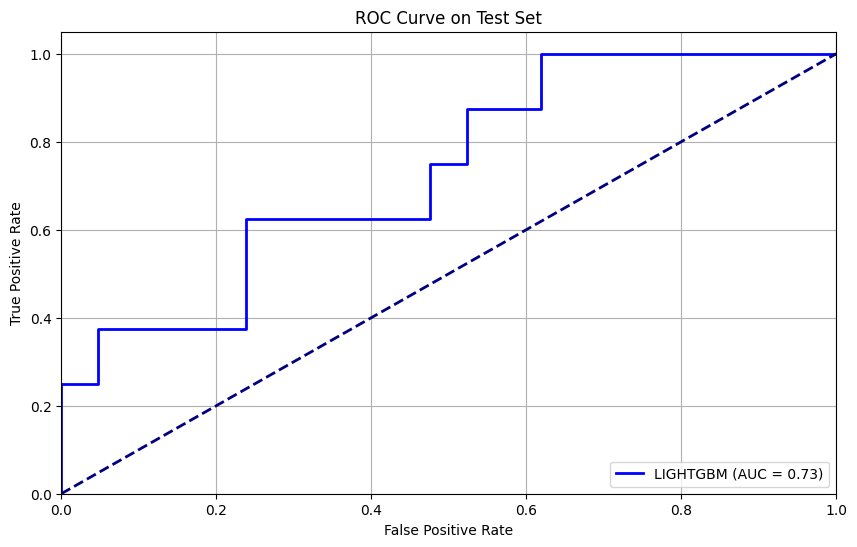

In [8]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Load model
model = joblib.load('../models/classifiers/xgboost_fried_model.joblib')

# Get predictions on test set only
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC on test set
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'LIGHTGBM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
print(f"Best AUC: {best_auc}")

Best AUC: 0.7192460317460317


In [ ]:
print(f"Best AUC: {best_auc}")

Best AUC: 0.7192460317460317


In [ ]:
print(f"Best AUC: {best_auc}")

Best AUC: 0.7192460317460317


In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=40)

c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


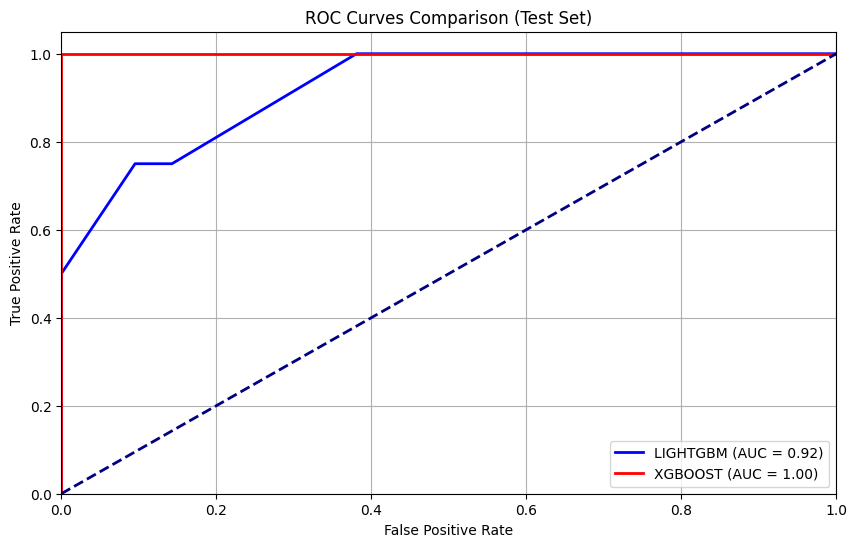

In [7]:
# 1. ROC Curves
plt.figure(figsize=(10, 6))
colors = {'lightgbm': 'blue', 'xgboost': 'red', 'catboost': 'green'}

for name, model in models.items():
    # Get predictions on test set only
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC on test set
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors[name], lw=2,
             label=f'{name.upper()} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


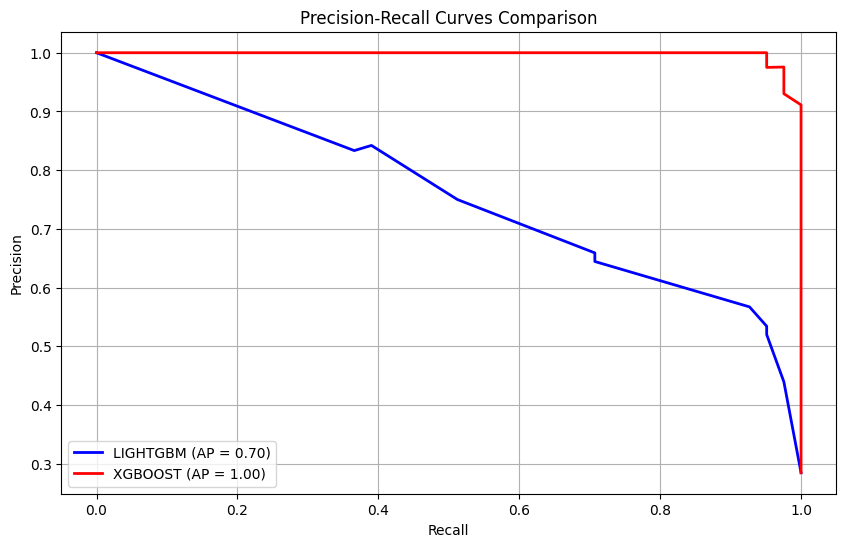

In [12]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    avg_precision = average_precision_score(y, y_pred_proba)
    
    plt.plot(recall, precision, color=colors[name], lw=2,
             label=f'{name.upper()} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc="best")
plt.grid(True)
plt.show()

c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


KeyboardInterrupt: 

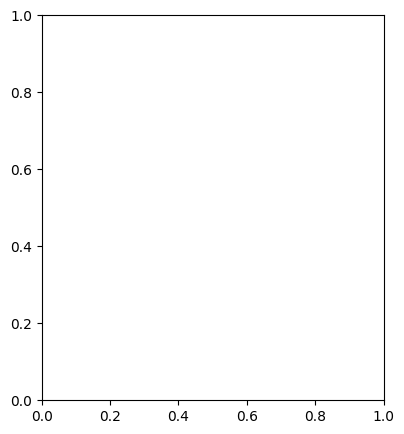

In [13]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='roc_auc'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, val_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, val_mean - val_std,
                     val_mean + val_std, alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('ROC AUC Score')
    plt.title(f'Learning Curve - {title}')
    plt.legend(loc='best')
    plt.grid(True)

plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plot_learning_curve(model, X, y, name.upper())
plt.tight_layout()
plt.show()

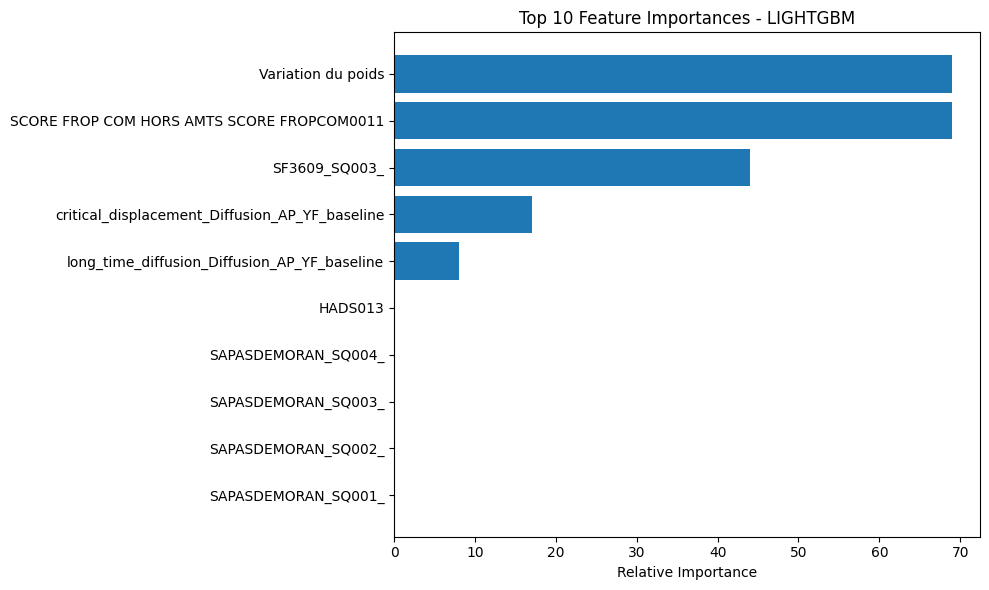

In [8]:
def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        feature_names = data_loader.get_feature_names()
        importances = model.feature_importances_
        indices = np.argsort(importances)[-10:]  # Top 10 features
        
        plt.figure(figsize=(10, 6))
        plt.title(f'Top 10 Feature Importances - {model_name}')
        plt.barh(range(10), importances[indices])
        plt.yticks(range(10), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.tight_layout()
        plt.show()

for name, model in models.items():
    plot_feature_importance(model, name.upper())

c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


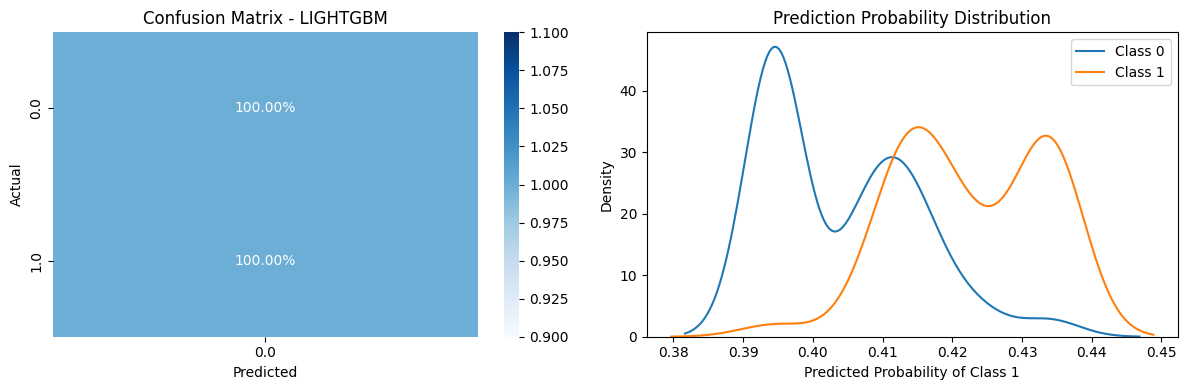

In [9]:
def plot_error_analysis(model, X, y, model_name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Create confusion matrix
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Confusion Matrix
    plt.subplot(1, 2, 1)
    cm = pd.crosstab(y, y_pred, normalize='index')
    sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Plot 2: Probability Distribution
    plt.subplot(1, 2, 2)
    for i in range(2):
        sns.kdeplot(y_pred_proba[y == i], label=f'Class {i}')
    plt.title('Prediction Probability Distribution')
    plt.xlabel('Predicted Probability of Class 1')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

for name, model in models.items():
    plot_error_analysis(model, X, y, name.upper())

c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Classification Report - LIGHTGBM
               precision    recall  f1-score   support

Not Frail (0)       0.72      1.00      0.83       103
    Frail (1)       0.00      0.00      0.00        41

     accuracy                           0.72       144
    macro avg       0.36      0.50      0.42       144
 weighted avg       0.51      0.72      0.60       144


Additional Metrics:
Sensitivity (True Positive Rate): 0.000
Specificity (True Negative Rate): 1.000
Positive Predictive Value (Precision): nan
Negative Predictive Value: 0.715


c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matth\miniconda3\envs\thesis_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

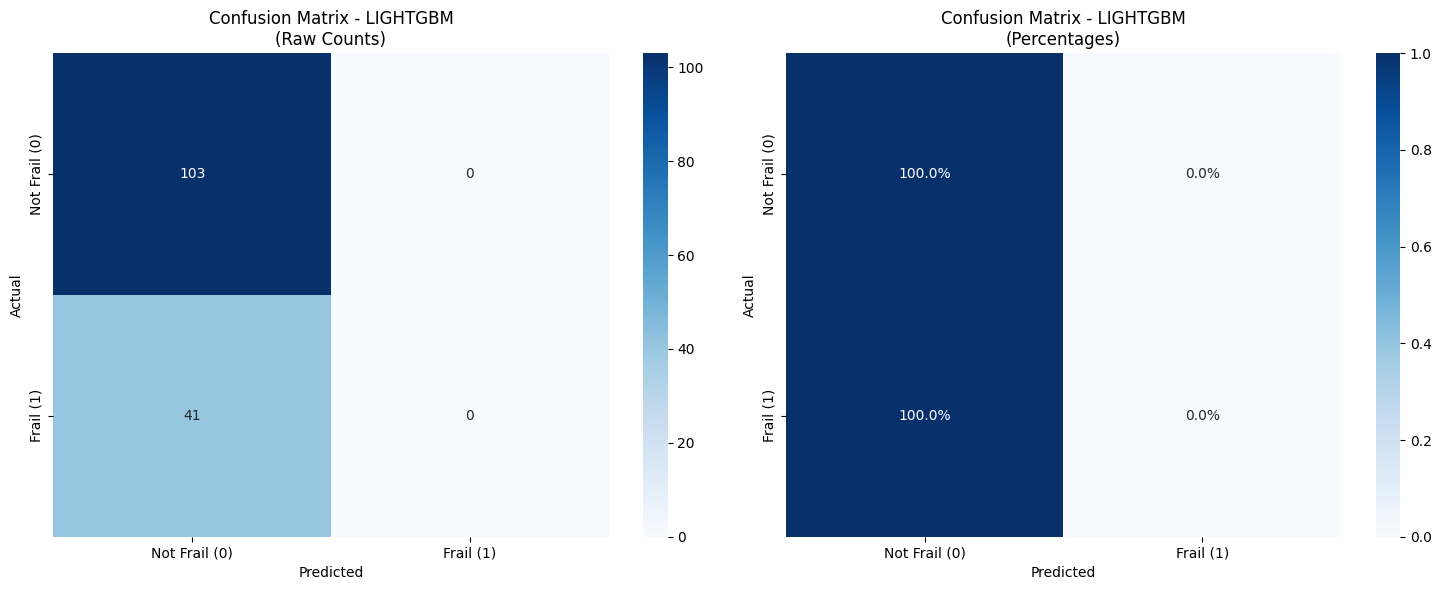

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X, y, model_name):
    # Get predictions
    y_pred = model.predict(X)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {model_name}\n(Raw Counts)')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_xticklabels(['Not Frail (0)', 'Frail (1)'])
    ax1.set_yticklabels(['Not Frail (0)', 'Frail (1)'])
    
    # Plot 2: Percentages
    sns.heatmap(cm_percent, annot=True, fmt='.1%', cmap='Blues', ax=ax2)
    ax2.set_title(f'Confusion Matrix - {model_name}\n(Percentages)')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    ax2.set_xticklabels(['Not Frail (0)', 'Frail (1)'])
    ax2.set_yticklabels(['Not Frail (0)', 'Frail (1)'])
    
    plt.tight_layout()
    
    # Print classification report
    print(f"\nClassification Report - {model_name}")
    print(classification_report(y, y_pred, target_names=['Not Frail (0)', 'Frail (1)']))
    
    # Calculate and print additional metrics
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
    specificity = tn / (tn + fp)  # True Negative Rate
    ppv = tp / (tp + fp)  # Positive Predictive Value (Precision)
    npv = tn / (tn + fn)  # Negative Predictive Value
    
    print("\nAdditional Metrics:")
    print(f"Sensitivity (True Positive Rate): {sensitivity:.3f}")
    print(f"Specificity (True Negative Rate): {specificity:.3f}")
    print(f"Positive Predictive Value (Precision): {ppv:.3f}")
    print(f"Negative Predictive Value: {npv:.3f}")
    
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    plot_confusion_matrix(model, X, y, name.upper())

In [10]:
# Optional: Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [11]:
# Train the model on the training data
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 20, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4140
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 220
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.277778 -> initscore=-0.955511
[LightGBM] [Info] Start training from score -0.955511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(boosting_type='dart', is_unbalance=True,
               learning_rate=0.24268386588455537, max_depth=9, n_estimators=257,
               num_leaves=236, objective='binary')

In [12]:
# Make predictions on the test data
y_pred = model.predict_proba(X_test)[:, 1]

# or predict on the test set
#y_pred = model.predict(X_test)

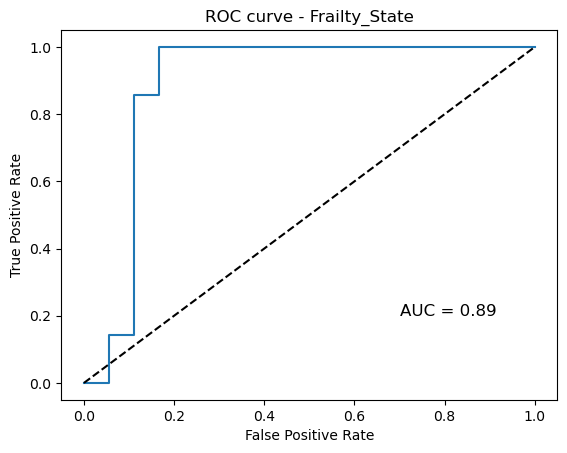

In [13]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, _ = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Frailty_State')
plt.plot([0, 1], [0, 1], 'k--')

plt.text(0.7, 0.2, f'AUC = {auc:.2f}', fontsize=12)

plt.show()


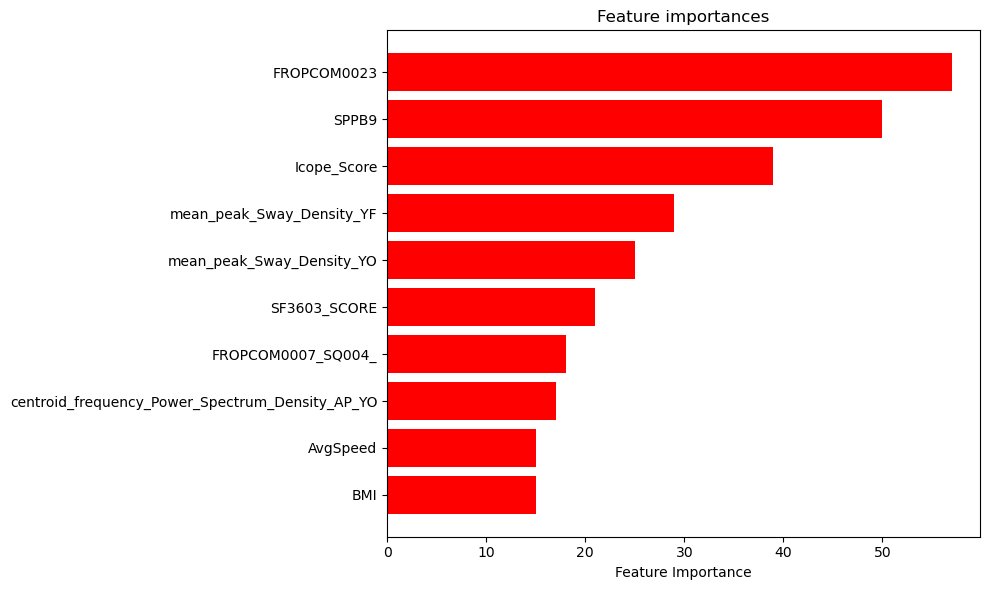

In [14]:
# # Plot the 10 most important features
feature_importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))  
plt.title("Feature importances")
plt.barh(range(10), feature_importances[indices[:10]], color="r", align="center")
plt.yticks(range(10), feature_names[indices[:10]])
plt.gca().invert_yaxis()  # invert y-axis to have the most important feature on top
plt.xlabel("Feature Importance")
plt.tight_layout()  # adjust layout to fit all labels
plt.show()
